<a href="https://colab.research.google.com/github/dyhwang7/STA4320/blob/main/final_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STA 4320 Final Practice - Daeyoung Hwang

In [1]:
load("/content/anesthesia.RData")
str(anesthesia)
attach(anesthesia)

'data.frame':	103 obs. of  5 variables:
 $ time     : num  0 7 24 4 30 4 12 13 27 4 ...
 $ treatment: chr  "M" "S" "S" "M" ...
 $ age      : num  52 54 46 54 41 21 68 61 44 28 ...
 $ gender   : chr  "F" "F" "F" "F" ...
 $ opioid   : num  30 150 0 15 90 15 15 60 90 0 ...


1.

In [2]:
slr <- lm(time ~ age)
summary(slr)
sd(age)
age



Call:
lm(formula = time ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.170  -8.037  -4.133   4.170  37.124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.0781     4.3891   3.435  0.00086 ***
age          -0.0367     0.0883  -0.416  0.67856    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.92 on 101 degrees of freedom
Multiple R-squared:  0.001708,	Adjusted R-squared:  -0.008177 
F-statistic: 0.1728 on 1 and 101 DF,  p-value: 0.6786


[1] 13.36289

[1] 52 54 46 54 41 21 68 61 44 28 36 60 34 64 37 51 58 24 28 50 74 52 53 19 41
 [26] 49 46 57 50 60 52 39 53 64 51 47 66 59 31 64 61 50 32 54 53 57 56 32 23 61
 [51] 52 18 42 44 22 48 52 48 51 54 36 53 66 60 50 53 52 36 66 32 57 54 52 31 36
 [76] 35 51 56 62 32 57 59 62 25 29 65 28 65 46 67 55 59 38 60 41 68 66 41 19 31
[101] 40 53 41

a)

i. For a new born baby, it would take on average 15 seconds for the anesthesia to take effect. While the age of 0 makes logical sense, it is well outside the range of our age so is not meaningful

ii. for every 10 years of age for a patient, the anesthesia takes 0.367 fewer minutes on average to block the pain for the patient

iii. 

In [3]:
confint(slr, level = 0.9) 
confint(slr, level = 0.9) * 10

,5 %,95 %
(Intercept),7.7919287,22.3643582
age,-0.1832906,0.1098875


,5 %,95 %
(Intercept),77.919287,223.643582
age,-1.832906,1.098875


We can be 90% certain that for each additional 10 years of age, mean time it takes for anesthesia to work is between 1.8 minutes lower and 1.1 minutes higher.

iv. We fail to reject the null hypothesis because 0 lies inside the CI. Therefore, age is not related to the amount of time it takes anesthesia to kick in

b)

i.

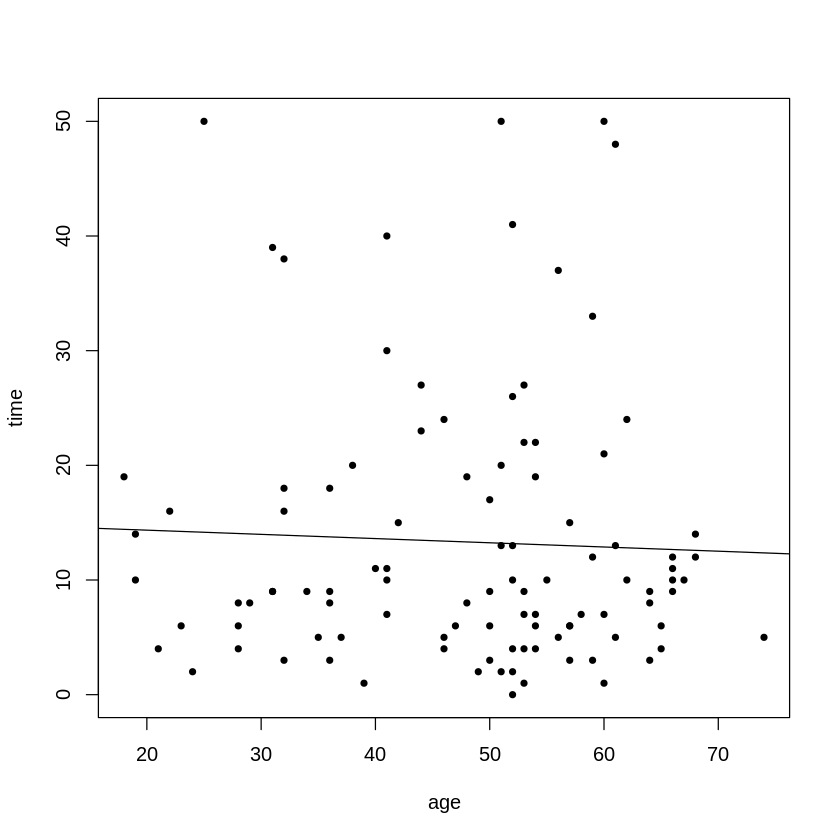

In [4]:
plot(age, time, pch=20)
abline(slr)


ii.

[1] 0.01941748

[1] 0.01941748

6 18 21 24 49 52 55 99 
 6 18 21 24 49 52 55 99

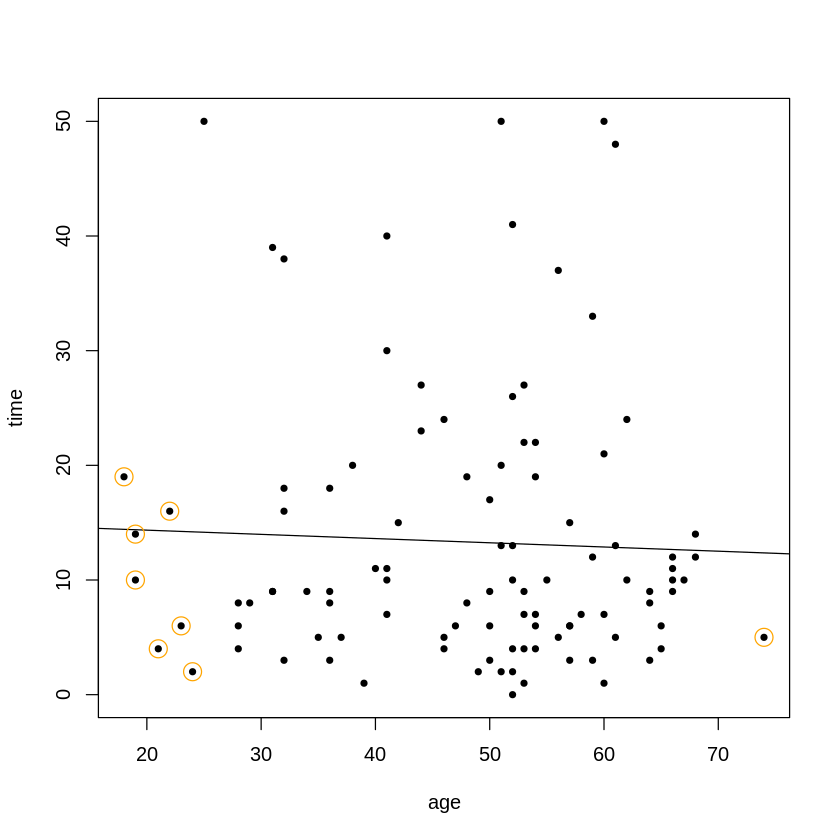

In [5]:
h <- hatvalues(slr)
hbar <- mean(h)
hbar
k <- 1
n <- nrow(anesthesia)
hbar <- (k + 1)/ n 
hbar
high_lev <- which(h > 2* hbar)
high_lev
plot(age, time, pch=20)
abline(slr)
points(age[high_lev], time[high_lev], col="orange", cex=2)

iii.

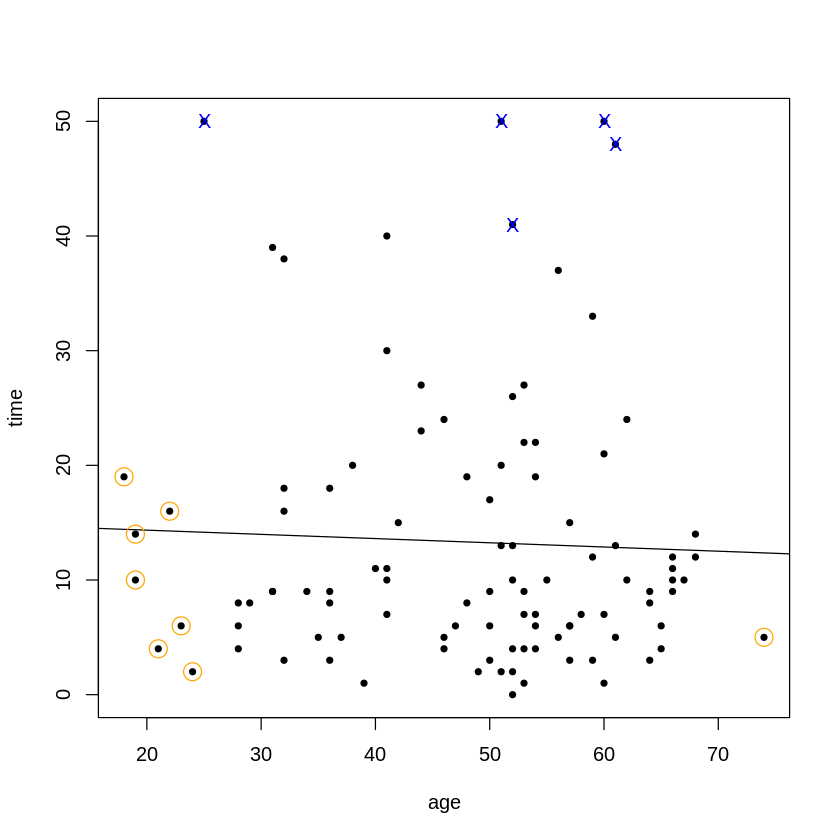

In [6]:
E_star <-rstudent(slr)
cutoff <- qt(0.99, n-k-2)
high_resid <- which(abs(E_star) > cutoff)
plot(age, time, pch=20)
abline(slr)
points(age[high_lev], time[high_lev], col="orange", cex=2)
points(age[high_resid], time[high_resid], col="blue", pch="X", cex=1)

iv.

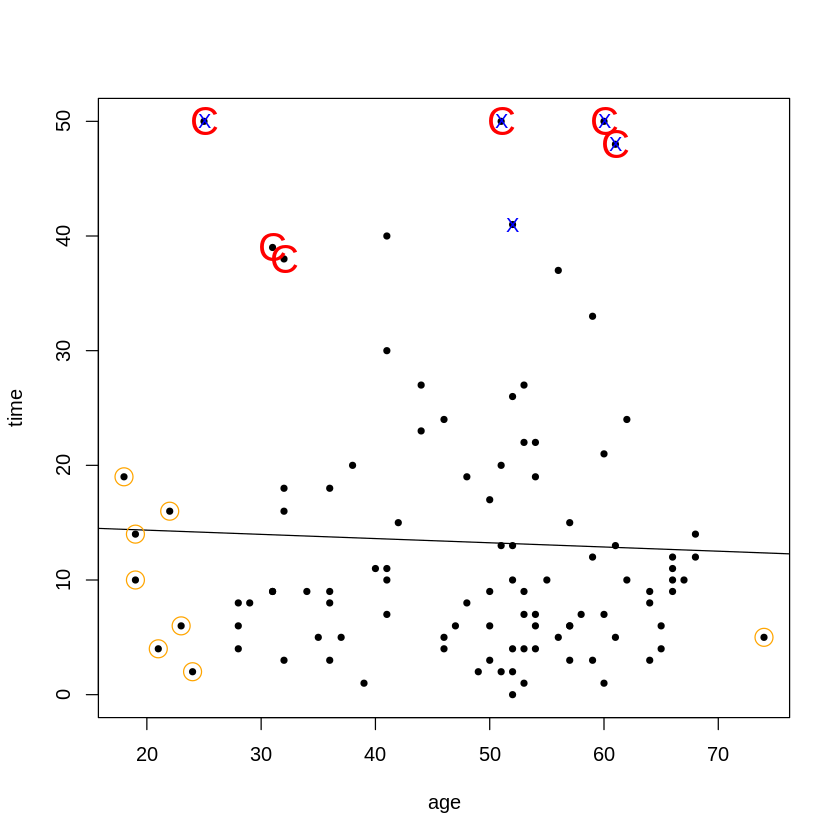

In [7]:
D <- cooks.distance(slr)
high_cook <- which(D > 4/(n-k-1))
plot(age, time, pch=20)
abline(slr)
points(age[high_lev], time[high_lev], col="orange", cex=2)
points(age[high_resid], time[high_resid], col="blue", pch="X", cex=1)
points(age[high_cook], time[high_cook], col="red", pch="C", cex=2)

v.

In [8]:
slr2 <- lm(time ~age, subset=-high_cook)
summary(slr2)
summary(slr)


Call:
lm(formula = time ~ age, subset = -high_cook)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.318  -6.304  -2.314   3.705  29.682 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 11.195423   3.414790   3.279  0.00146 **
age          0.002363   0.068375   0.035  0.97250   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.867 on 95 degrees of freedom
Multiple R-squared:  1.258e-05,	Adjusted R-squared:  -0.01051 
F-statistic: 0.001195 on 1 and 95 DF,  p-value: 0.9725



Call:
lm(formula = time ~ age)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.170  -8.037  -4.133   4.170  37.124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  15.0781     4.3891   3.435  0.00086 ***
age          -0.0367     0.0883  -0.416  0.67856    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.92 on 101 degrees of freedom
Multiple R-squared:  0.001708,	Adjusted R-squared:  -0.008177 
F-statistic: 0.1728 on 1 and 101 DF,  p-value: 0.6786


The sign of the point estimate changed from negative to positive. However, both estimates were very close to 0, and for both models, the relationship was not at all close to being statistically significant. So nothing in any substantial or important way

c.

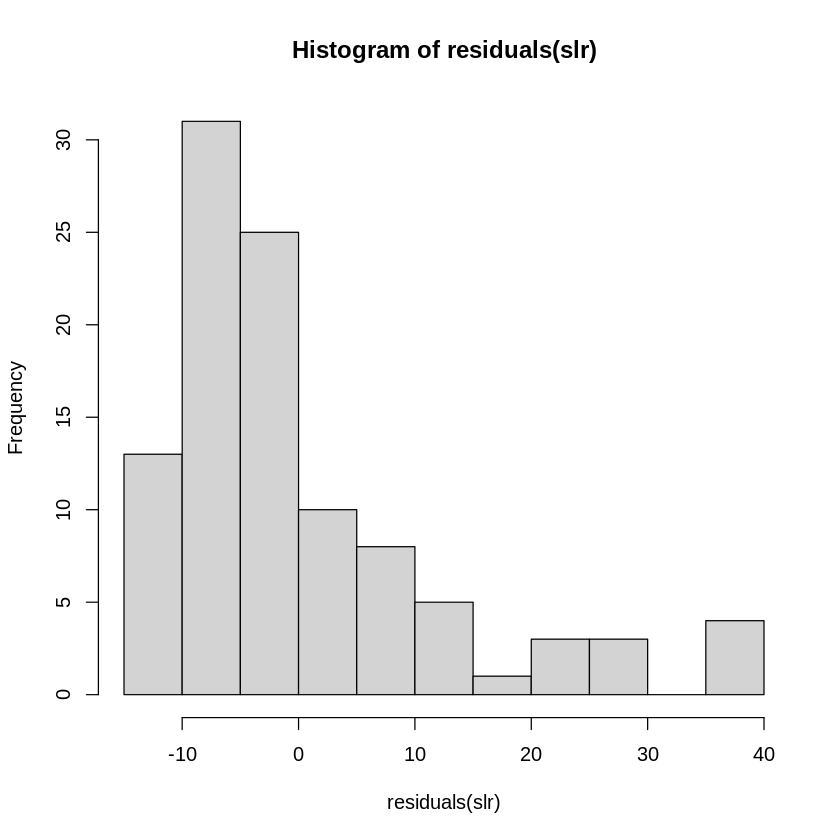

In [9]:
hist(residuals(slr))

The residuals appear to have a substantial right skew. This indicates that the assumption of noramlity of errors is violated

2.

a.

In [10]:
sequential <-as.numeric(treatment=="S")
table(sequential, treatment)
male <- as.numeric(gender=="M")
table(male, gender)
mlr <- lm(time ~ sequential + age + male)
summary(mlr)

          treatment
sequential  M  S
         0 52  0
         1  0 51

    gender
male  F  M
   0 57  0
   1  0 46


Call:
lm(formula = time ~ sequential + age + male)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.337  -7.494  -3.916   3.758  39.498 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 11.49604    4.78880   2.401   0.0182 *
sequential   3.44671    2.37908   1.449   0.1506  
age         -0.01656    0.08844  -0.187   0.8518  
male         2.03980    2.38256   0.856   0.3940  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.84 on 99 degrees of freedom
Multiple R-squared:  0.03399,	Adjusted R-squared:  0.004713 
F-statistic: 1.161 on 3 and 99 DF,  p-value: 0.3286


i.

B1 = 3.44671; the mean time for the anesthesia to work is 3.5 minutes higher for the sequential method than for the mixture method, assuming age and gender are fixed. The mixture appears better since it takes less time on average for the anesthesia to work

ii.

Because the p-value of sequential is 0.1506, we do not have evidence that the anesthesia method is related to the time to effect. Hence, this relationship is not statistically significant

b.

Overall F-test addresses the question "are any of my X's related to Y's", so this is an overall F-test

i.

H0: beta1=beta2=beta3=0;None of the variables anesthesia method, age, or gender is related to the time it takes the anesthesia to work

HA: betaj != 0 for some j = 1, 2, or 3; at least one of method, age, or gender is related to the time it takes the anesthesia to work


ii.

ii. F_ts = 1.161, p-value = 0.3286. We fail to reject H0; we have no evidence that any of the variables anesthesia method, age, or gender is related to the time it takes the anesthesia to work


3.

a.

Y = amount of opioid pain relieving medication (mg) the patient took immediately following surgery

X1 = age (years)

X2 = gender(0 for female, 1 for male)

X3 = indicator treatment type (0 for mixture, 1 for sequential)

X4 = time it took for the anesthesia to work

In [11]:
mlr2 <-lm(opioid ~ age + male + sequential + time)
summary(mlr2)



Call:
lm(formula = opioid ~ age + male + sequential + time)

Residuals:
   Min     1Q Median     3Q    Max 
-92.51 -35.90 -15.30  22.87 160.89 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43.11864   23.19299   1.859 0.066010 .  
age           0.04249    0.41643   0.102 0.918941    
male        -31.34780   11.25872  -2.784 0.006438 ** 
sequential    1.21527   11.31900   0.107 0.914719    
time          1.62800    0.47318   3.441 0.000854 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 55.75 on 98 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1218 
F-statistic: 4.537 on 4 and 98 DF,  p-value: 0.002099


b.

B2 = -31.34780; male patients on average used 31.3grams less opioids post operatively compared to female patients of the same age, same anesthesia method, and same time taken for the anesthesia to work

c.

i.

H0: beta3=beta4=0; neither anesthesia method nor time for anesthesia effect is related to post-op opioid use among patients of fixed age and gender

HA: beta3 != 0 or beta4 != 0 at least one of anesthesia method nor time for anesthesia effect is related to post-op opioid use among patients of fixed age and gender

ii.

In [12]:
full_model <- mlr2
null_model <- lm(opioid ~ age + male)
RSS1 <- sum(residuals(full_model)^2)
RSS0 <- sum(residuals(null_model)^2)
n <- nrow(anesthesia) #sample size
k <- 4 #number of x's in full model
q <- 2 #difference in number of x's between the two models
F_ts <- (RSS0 - RSS1)/q/(RSS1/(n-k-1))
F_ts

p_val <- pf(F_ts, q, n-k-1, lower.tail=FALSE)
p_val

[1] 6.104453

[1] 0.003172926

iii.

In [13]:
anova(null_model, full_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100,342501.1,NA,NA,NA,NA
2,98,304558.9,2,37942.15,6.104453,0.003172926


iv.

Since the p-value is less than alpha = 0.05, we reject H0. At least one of anesthesia method nor time for anesthesia effect is related to post-op opioid use among patients of fixed age and gender

v.

Since the p-value for the time variable is much, much smaller than the p-value for the sequential variable, it appears that the time it takes the anesthetic to take effect is more strongly related to the amount of opioids used than the anesthesia administration method